In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels as sts 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


2879.1828885400314 2588.5 2357731.189471719
2784.0432051478474 2497.0 2279493.9681042056


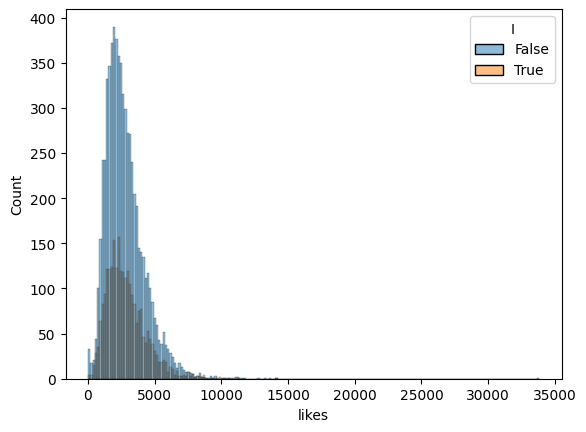

In [11]:
sns.histplot(df, x='likes', hue='I');

x = df[df.I].likes.values
y = df[~df.I].likes.values

print(np.mean(x), np.median(x), np.var(x))
print(np.mean(y), np.median(y), np.var(y))

118.82025117739404 97.0 7769.260469010694
112.70828864715796 94.0 7081.395217034502


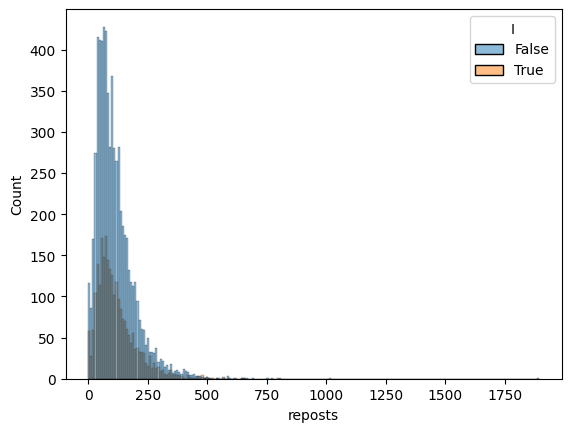

In [39]:
sns.histplot(df, x='reposts', hue='I');

x = df[df.I].reposts.values
y = df[~df.I].reposts.values

print(np.mean(x), np.median(x), np.var(x))  # E(X) = l = Var(l)
print(np.mean(y), np.median(y), np.var(y))

In [40]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(np.quantile(x, i), np.quantile(y, i))

36.0 36.0
53.0 49.0
67.0 63.0
81.0 77.0
97.0 94.0
117.0 111.0
139.0 133.0
172.0 163.0
228.0 212.0


In [20]:
diff = x.mean() - y.mean()
diff_std = np.sqrt(x.var(ddof=1)/x.size + y.var(ddof=1)/y.size)
z_obs = diff/diff_std
z_obs

3.0055132118670893

In [21]:
alpha = 0.05
stats.norm().ppf(1 - alpha/2)

1.959963984540054

In [22]:
2* (1 - stats.norm().cdf(z_obs))

0.0026513307752207282

In [23]:
from statsmodels.stats.weightstats import ztest

z_obs, pval = ztest(x, y, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
z_obs, pval

(3.067351956070353, 0.002159644080409763)

In [33]:
# from statsmodels.stats.weightstats import CompareMeans
# cm = CompareMeans(x, y)
# cm.ztest_ind(alternative='two-sided', usevar='unequal', value=0)

In [34]:
# Тест Манна-Уитни!

from scipy.stats import mannwhitneyu

U, pval = mannwhitneyu(x, y, alternative='two-sided')
U

8640671.0

In [35]:
pval

0.003728256596733177

In [36]:
U = 0
for item in x:
    for jtem in y:
        U += (item > jtem)
        U += 0.5*(item == jtem)
U

8640671.0

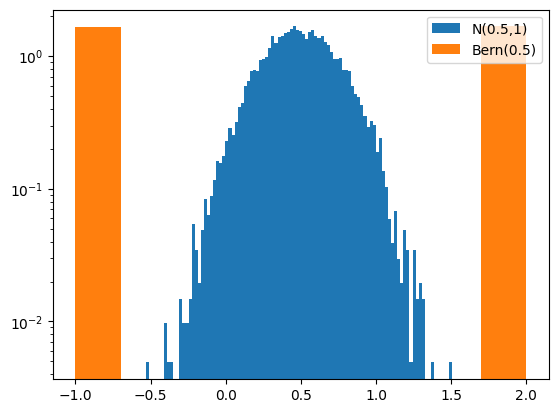

In [47]:
import matplotlib.pyplot as plt

n_obs = 10**4
x = stats.norm(0.5, 0.25).rvs(n_obs)
y = 3*stats.bernoulli(0.5).rvs(n_obs) - 1

plt.hist(x, bins=100, density=True, label='N(0.5,1)');
plt.hist(y, density=True, label='Bern(0.5)', log=True);
plt.legend();

In [48]:
_, pval = mannwhitneyu(x, y, alternative='two-sided')
pval

0.2959196838596132

In [49]:
stats.ks_2samp(x, y)

KstestResult(statistic=0.5042, pvalue=0.0, statistic_location=1.5079414250282481, statistic_sign=1)